
# Hopkins-Statistic-Clustering-Tendency
A python implementation for computing the Hopkins' statistic [(Lawson and Jurs (1990))](https://pubs.acs.org/doi/abs/10.1021/ci00065a010) for measuring clustering tendency of data. In this notebook, Hopkins' statistic has been computed for the [**iris dataset**](https://archive.ics.uci.edu/ml/datasets/iris)



## Clustering Tendency
Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).
However, clustering algorithms will locate and specify clusters in data even if none are present. It is therefore appropriate to measure the clustering tendency or randomness of a data set before subjecting it to a clustering algorithm.

## Assessing Clustering Tendency using Hopkins' Statistic
Hopkins’ statistic is a simple measure of clustering tendency. It is based on the difference between the distance from a real point to its nearest neighbor, U, and the distance from a randomly chosen point within the data space to the nearest real data point, W.  



In [1]:
#importing the required libraries
import numpy as np
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from random import sample
from numpy.random import uniform


## Algorithm

- Let X be the set of n data points.
- Consider a random sample (without replacement) of m<<n data points with members x(i). [(Lawson and Jurs (1990))](https://pubs.acs.org/doi/abs/10.1021/ci00065a010) suggest choosing 5% of the data points so that the nearest-neighbor distances will be independent and thus approximate a Beta distribution.
- Generate a set Y of m uniformly randomly distributed data points.
- Define two distance measures,
    - u(i), the distance of y(i) in Y from its nearest neighbour in X, and
    - w(i), the distance of x(i) in X from its nearest neighbour in X.
- if the data is d dimensional, then the Hopkins statistic is defined as:

$$
H = \frac{\sum_{i=1}^n u_i}{\sum_{i=1}^n w_i + \sum_{i=1}^n u_i}
$$


## Python Implementation for computing Hopkins' Statistic:

In [2]:

# function to compute hopkins's statistic for the dataframe X
def hopkins_statistic(X):

    X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0]*0.05) #0.05 (5%) based on paper by Lawson and Jures


    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))



    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]


    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    # First column of the matrix
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    
    # Second column of the matrix
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]



    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H




## Computing Hopkins' Statistic for Iris Dataset:

In [ ]:
data=pd.read_csv('../content/Iris.csv')
data=data.drop('Id',axis=1)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Dataset information
-  Number of Instances: 150 (50 in each of three classes)

-  Number of Attributes: 4 numeric, predictive attributes and the class (5 total)

-  Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class:
      - Iris Setosa
      -  Iris Versicolour
      -  Iris Virginica

-  Missing Attribute Values: None



In [ ]:
data.columns=['sepal length' , 'sepal width' , 'petal length', 'petal width', 'class'] #renaming columns
X=data[['sepal length' , 'sepal width' , 'petal length', 'petal width']] #independent attributes
y=data['class'] #class attribute
data


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object


    
## Visualisation of Iris Dataset
Let's start by visualising the data so as to assess whether or not it has any meaningful clusters.
As the data contains more than two variables, we need to reduce the dimensionality in order to plot a scatter plot. We use PCA for dimensionality reduction.

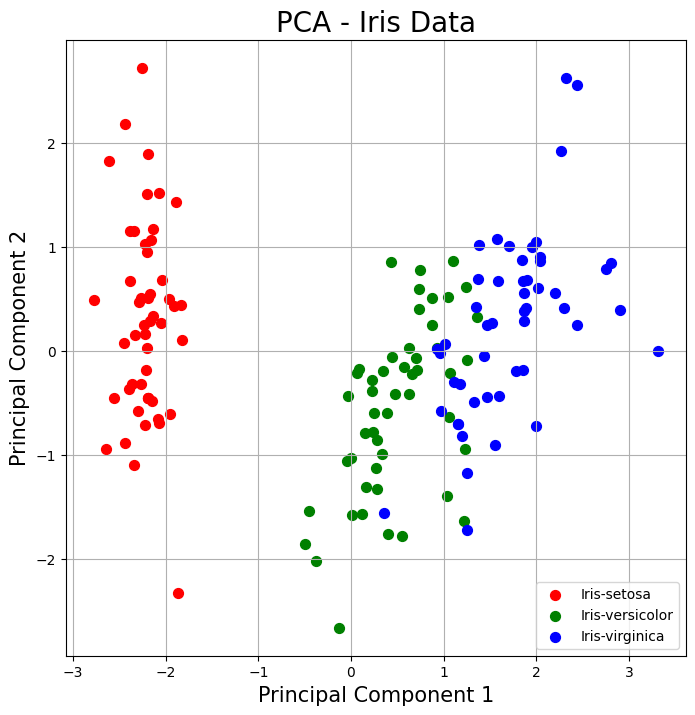

In [7]:

#Perform PCA on the original data (so that 4-D data can be visualised in 2-D)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Standardizing the features
x= StandardScaler().fit_transform(X)


#perform PCA
pca = PCA(n_components=2) #2 components = 2 Dimensions
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, data[['class']]], axis = 1)


#plotting the data
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA - Iris Data', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

#zip function returns an iterator of tuples
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


It can be seen that the iris data set contains 3 real clusters.

## Visualisation of random uniform data in the same space
We now generate a random uniform dataset and visually inspect if it has any clusters. Again, we use PCA for dimensionality reduction

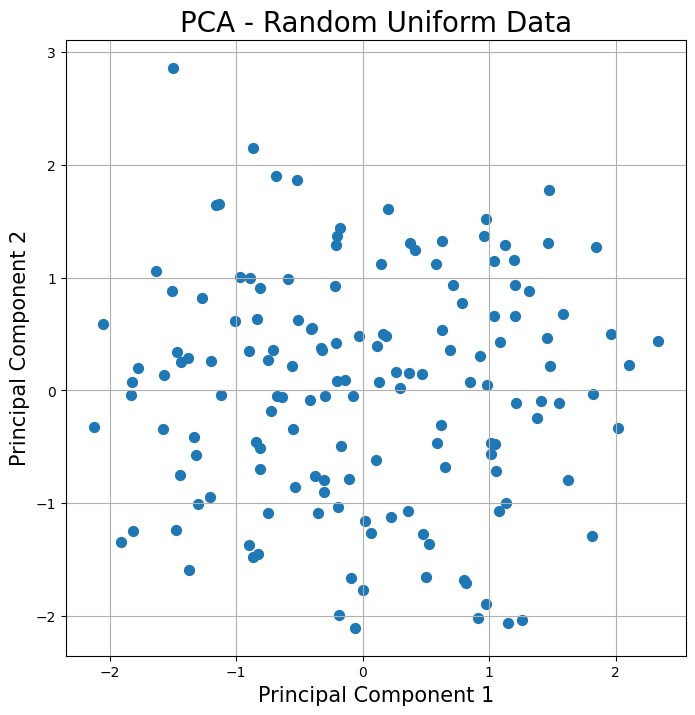

In [8]:
X_uniform_random = np.random.uniform(X.min(axis=0), X.max(axis=0) ,(X.shape) )

# Standardizing the features
x= StandardScaler().fit_transform(X_uniform_random)


#perform PCA
pca = PCA(n_components=2) #2 components = 2 Dimensions
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = principalDf



#plotting the data
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA - Random Uniform Data', fontsize = 20)
ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'], s = 50)

ax.grid()



The iris data set contains 3 real clusters. However the randomly generated data set doesn’t contain any meaningful clusters.
**Thus, we expect the cluster tendency of iris dataset to be high.**

## Computing Hopkins' Statistic for Iris Dataset:

In [9]:
# call the function on the iris dataset
H=hopkins_statistic(X)
print(H)

0.8358058314025368


In [10]:
# call the function on the iris dataset
H2=hopkins_statistic(finalDf)
print(H2)

0.5467524060077437


Since multiple calls of the function will result in different values of H, we call the function and compute Hopkins' Statistic multiple times, and take its average.

In [11]:
l = [] #list to hold values for each call
for i in range(20):
    H=hopkins_statistic(X)
    l.append(H)
#print average value:
np.mean(l)

np.float64(0.8277778110626279)

## Interpretation of Hopkins' Statistic:
If X were uniformly distributed, then the distances for the real and artificial (uniform, random data) points would be close to each other, and thus H would be about 0.5. However, if clusters are present in X, then the distances for artificial points would be substantially larger than for the real ones in expectation, and thus the value of H will increase .

A value for H higher than 0.75 indicates a clustering tendency at the 90% confidence level.

The null and the alternative hypotheses are defined as follow:

- Null hypothesis: the data set X is uniformly distributed (i.e., no meaningful clusters)
- Alternative hypothesis: the data set X is not uniformly distributed (i.e., contains meaningful clusters)

Therefore, we can interpret Hopkins' statistic in the following manner:

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

Since the value of Hopkins' Statistic obtained here (~0.83) is > 0.75, we reject the null hypothesis, and conclude  the iris dataset is significantly a clusterable data.


## References:

1. https://www.datanovia.com/en/lessons/assessing-clustering-tendency/#statistical-methods
2. https://pubs.acs.org/doi/pdf/10.1021/ci00065a010
3. https://datascience.stackexchange.com/questions/14142/cluster-tendency-using-hopkins-statistic-implementation-in-python
4. https://matevzkunaver.wordpress.com/2017/06/20/hopkins-test-for-cluster-tendency/

